## PROYECTO VIETORIS RIPS
COMPONENTES CONEXAS

Librerias

In [1]:
  # Math
import numpy as np
import math
  # Graph
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.style.use('dark_background')

Funciones necesarias para las operaciones

In [2]:
class point:
  def __init__(self, id, coordenates):
    self.id = id
    self.coordenates = coordenates

In [3]:
def euclidean_distance(point_a, point_b, delta):
  distance = math.sqrt((point_a[0] - point_b[0])**2 + (point_a[1] - point_b[1])**2)
  if distance <= delta:
    return True
  return False

def exist_object(edges, point_a, point_b):
  for edge in edges:
    if (edge[1][0] == point_a and edge[1][1] == point_b) or (edge[1][0] == point_b and edge[1][1] == point_a):
      return True
  return False

### Reciba un numpy.array de $(n,2)$ , es decir, de $n$ filas y $2$ columnas, representando las coordenadas $(x,y)$ de $n$ puntos.

In [4]:
cloud_points = np.array([[9.75518237, 5.81497842],
       [3.45988965, 2.88846354],
       [1.30930769, 3.05334725],
       [8.23692528, 5.49768143],
       [9.47634547, 8.5349278 ],
       [8.59666776, 1.45666669],
       [6.09596423, 4.36803239],
       [6.51740602, 6.97451716],
       [2.88271691, 4.39668308],
       [6.92791098, 6.34423988],
       [1.86223387, 2.24861989],
       [5.49410032, 8.86093052],
       [2.74047984, 1.8251915 ],
       [5.47522799, 1.95373556],
       [2.65367481, 0.3778547 ],
       [1.33753431, 9.44839125],
       [8.9293468 , 1.5129663 ],
       [8.62067333, 9.65666413],
       [1.95749005, 7.07466761],
       [7.37702115, 9.79646556],
       [9.65369316, 4.42364967],
       [7.7449174 , 6.30669989],
       [2.98263896, 8.14287513],
       [8.48914703, 2.17415063],
       [5.23543337, 7.68480516],
       [2.03671421, 2.90304778],
       [5.79807424, 3.94384073],
       [2.38341777, 6.90192915],
       [8.93024434, 3.97981222],
       [0.10581909, 7.15433648]])
print(f'\nEl tamaño de su matriz es {cloud_points.shape}')

points = []
for i, p in enumerate(cloud_points):
  points.append(point(i, p))


El tamaño de su matriz es (30, 2)


Dado un valor de delta > 0

In [5]:
delta = 2.5

### Imprima la gráfica del complejo de **Vietoris-Rips** en los niveles 0, 1, 2. Es decir, puntos, aristas y triángulos (estos últimos rellenos).


Obtención de las aristas (1-simpliciales, lineas)

In [6]:
edges = []
for point_a in points:
  for j in range(point_a.id+1, len(points)):
    point_b = points[j]
    if euclidean_distance(point_a.coordenates, point_b.coordenates, delta):
      edges.append((len(edges), [point_a.id, point_b.id]))     

Obtención de los triángulos (2-simplices, caras)

In [7]:
faces = []
for i, edge_a in enumerate(edges):
  edge_a = edge_a[1]
  for j in range(i+1, len(edges)):
    edge_b = edges[j][1]

    if edge_a[0] == edge_b[0]:
      if exist_object(edges, edge_a[1], edge_b[1]):
        faces.append([edge_a[0], edge_a[1], edge_b[1]])
    if edge_a[0] == edge_b[1]:
      if exist_object(edges, edge_a[1], edge_b[0]):
        faces.append([edge_a[0], edge_a[1], edge_b[0]])
    if edge_a[1] == edge_b[0]:
      if exist_object(edges, edge_a[1], edge_b[0]):
        faces.append([edge_a[0], edge_a[1], edge_b[1]])
    if edge_a[1] == edge_b[1]:
      if exist_object(edges, edge_a[0], edge_b[0]):
        faces.append([edge_a[0], edge_a[1], edge_b[0]])

Grafica de complejo de Rips para los niveles 0, 1, 2

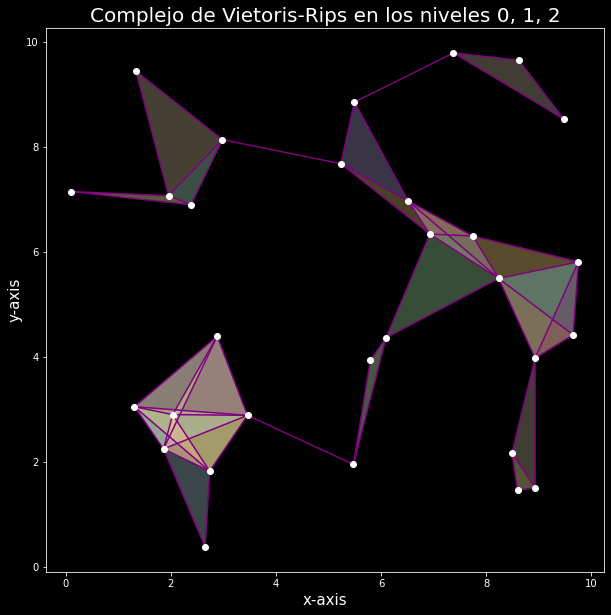

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('x-axis', fontsize = 15)
ax.set_ylabel('y-axis', fontsize = 15)
ax.set_title("Complejo de Vietoris-Rips en los niveles 0, 1, 2", fontsize = 20)
# Graph points, nivel 0
ax.scatter(cloud_points[:,0], cloud_points[:,1], color= "white", marker= "o", zorder=3)
# Graph edges, nivel 1
for edge in edges:
  punto_a = points[edge[1][0]]
  punto_b = points[edge[1][1]]
  ax.plot([punto_a.coordenates[0], punto_b.coordenates[0]], [punto_a.coordenates[1], punto_b.coordenates[1]], color='purple', zorder=2)
# Graph faces, nivel 2
for face in faces:
  ax.fill([points[f].coordenates[0] for f in face], [points[f].coordenates[1] for f in face], alpha=0.2, zorder=1)
plt.show()

### Una gráfica de donde en el eje x es delta (entre $0$ y $6$) y en el eje y se grafica el número de componentes conexas que hay para ese valor de delta.


Funciones necesarias para calculo de componentes conexas

In [9]:
def related_component_count(points_amount, adj):    
  visited = [False for i in range(points_amount)]
  count = 0
  for v in range(points_amount):
    if (visited[v] == False):
      travel_connected_paths(v, visited, adj)
      count += 1
  return count
         
def travel_connected_paths(v, visited, adj):
  visited[v] = True
  for i in adj[v]:
    if (not visited[i]):
      travel_connected_paths(i, visited, adj)

Funciones necesarias para calculo de aristas y puntos adjacentes

In [10]:
def get_edges(points, delta):
  edges = []
  for point_a in points:
    for j in range(point_a.id+1, len(points)):
      point_b = points[j]
      if euclidean_distance(point_a.coordenates, point_b.coordenates, delta):
        edges.append((len(edges), [point_a.id, point_b.id]))
  return edges

def calculate_adj(edges):
  adj = []
  for point in points:
    adj_point = []
    for edge in edges:
      if point.id in edge[1]:
        edge_copy = edge[1].copy()
        edge_copy.remove(point.id)
        adj_point += edge_copy
    adj.append(adj_point)
  return adj

Calculo de las componentes conexas con respecto a un delta en un rango

In [11]:
related_components = []
x = np.linspace(0, 6, 66)
for delta in x:
  edges = get_edges(points, delta)
  adj = calculate_adj(edges)
  count = related_component_count(len(points), adj)
  related_components.append(count)

<BarContainer object of 66 artists>

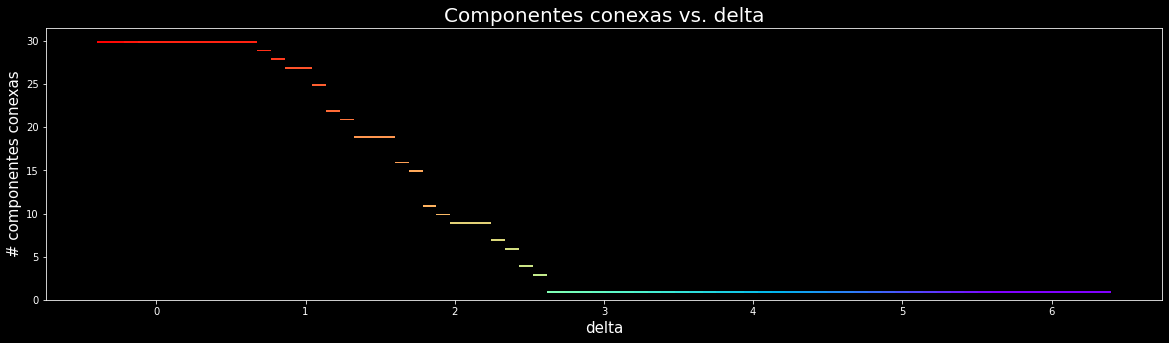

In [12]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_xlabel('delta', fontsize = 15)
ax.set_ylabel('# componentes conexas', fontsize = 15)
ax.set_title('Componentes conexas vs. delta', fontsize = 20)

color = cm.rainbow(np.linspace(1, 0, 66))
ax.bar(x, related_components, color=color)
ax.bar(x, [rc - 0.2 for rc in related_components], color='black')

### Una gráfica de $8$ páneles de ancho y $4$ de alto, donde se grafica el diagrama de Vietoris-Rips con el menor delta que realiza las componentes conexas comenzando desde $0$ hasta $32$. Es decir, el primer diagrama es el de todos los puntos disconexos, el segundo es el diagrama con el primer delta que realiza el diagrama con dos puntos pegados ($n-1$ componentes conexas), el tercero con el delta que realiza ($n-2$) componentes conexas, etc.


In [13]:
def find_min_distance(points, delta):
  min_distance = 999999
  for i, point_a in enumerate(points):
    for j in range(i+1, len(points)):
      point_b = points[j]
      distance = math.sqrt((point_a.coordenates[0] - point_b.coordenates[0])**2 + (point_a.coordenates[1] - point_b.coordenates[1])**2)
      if distance > delta and distance < min_distance:
        min_distance = distance
  return min_distance

def get_faces(edges):
  faces = []
  for i, edge_a in enumerate(edges):
    edge_a = edge_a[1]
    for j in range(i+1, len(edges)):
      edge_b = edges[j][1]

      if edge_a[0] == edge_b[0]:
        if exist_object(edges, edge_a[1], edge_b[1]):
          faces.append([edge_a[0], edge_a[1], edge_b[1]])
      if edge_a[0] == edge_b[1]:
        if exist_object(edges, edge_a[1], edge_b[0]):
          faces.append([edge_a[0], edge_a[1], edge_b[0]])
      if edge_a[1] == edge_b[0]:
        if exist_object(edges, edge_a[1], edge_b[0]):
          faces.append([edge_a[0], edge_a[1], edge_b[1]])
      if edge_a[1] == edge_b[1]:
        if exist_object(edges, edge_a[0], edge_b[0]):
          faces.append([edge_a[0], edge_a[1], edge_b[0]])
  return faces

def create_graph(ax, title, x, y, cloud_points, edges, faces):
  ax[x, y].set_title(title, fontsize = 10)
  # Graph points, nivel 0
  ax[x, y].scatter(cloud_points[:,0], cloud_points[:,1], s=3, color= "white", marker= "o", zorder=3)
  # Graph edges, nivel 1
  for edge in edges:
    punto_a = points[edge[1][0]]
    punto_b = points[edge[1][1]]
    ax[x, y].plot([punto_a.coordenates[0], punto_b.coordenates[0]], [punto_a.coordenates[1], punto_b.coordenates[1]], color='purple', zorder=2)
  # Graph faces, nivel 2
  for face in faces:
    ax[x, y].fill([points[f].coordenates[0] for f in face], [points[f].coordenates[1] for f in face], alpha=0.2, zorder=1)

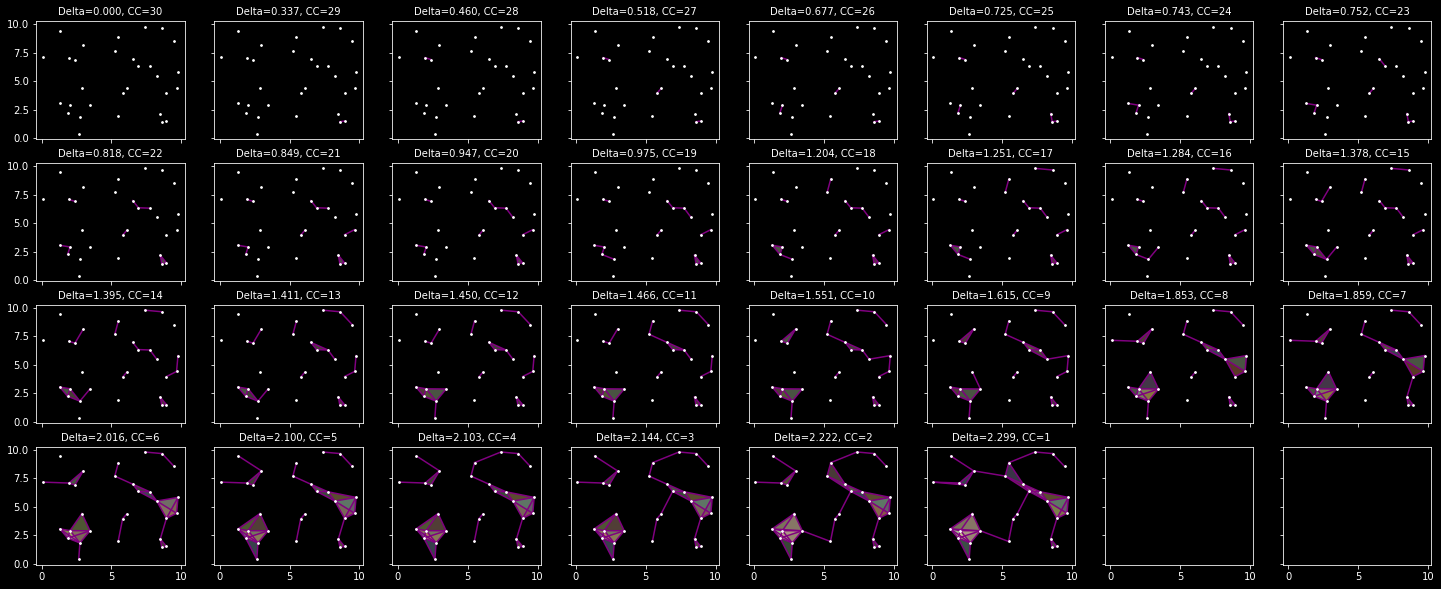

In [14]:
related_components = []
last_count = len(points)+1
delta = 0
fig_size = (4, 8)
fig, ax = plt.subplots(fig_size[0], fig_size[1], figsize=(25,10), sharex=True, sharey=True)

num_of_graphs = 0
while last_count > 1:
  edges = get_edges(points, delta)
  adj = calculate_adj(edges)
  count = related_component_count(len(points), adj)
  related_components.append(count)
  faces = get_faces(edges)
  if count != last_count:
    last_count = count
    create_graph(ax, f'Delta={delta:,.3f}, CC={count}', num_of_graphs//fig_size[1], num_of_graphs%fig_size[1], cloud_points, edges, faces)
    num_of_graphs += 1
  delta = find_min_distance(points, delta)